# auto feature nyc taxi + batch predict

## 1. Load Datasets

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
test_data = pd.read_csv("nyx_taxi_fare_predict_test.csv")
display(test_data)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,11.00,2013-11-25 11:22:00 UTC,-73.945600,40.786480,-73.961150,40.765790,1
1,7.00,2013-12-27 17:19:03 UTC,-73.978914,40.761922,-73.961612,40.770078,1
2,8.00,2014-08-22 04:42:00 UTC,-73.951347,40.689392,-73.950817,40.662485,1
3,57.33,2014-11-06 06:37:00 UTC,-73.781178,40.644995,-73.945807,40.777675,1
4,10.50,2009-10-03 21:53:00 UTC,-73.991732,40.726437,-74.006710,40.741587,5
...,...,...,...,...,...,...,...
5431590,14.00,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
5431591,4.20,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
5431592,14.10,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
5431593,28.90,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1


## 2. load pre-generated pipeline and execute

In [3]:
from pyrecdp.autofe import FeatureWrangler, DataEstimator

config = {'dataset': test_data, 'label': 'fare_amount'}
predict_pipeline = DataEstimator(data_pipeline = "nyc_taxi_pipeline.json", method = 'predict', config = config)
predictions = predict_pipeline.fit_transform()

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


{0: DataFrame, 1: type_infer, 2: astype, 3: fillna, 4: DataFrame, 5: type_infer, 6: tuple, 7: tuple, 8: astype, 9: fillna, 10: astype, 11: datetime_feature, 12: haversine, 13: drop, 14: DataFrame, 15: lightgbm}
execute with pandas started ...
execute DataFrame started ...
  execute DataFrame took 0.21048383391462266 sec
execute type_infer started ...
  execute type_infer took 0.0917730878572911 sec
execute astype started ...
  execute astype took 0.03468959289602935 sec
execute fillna started ...
  execute fillna took 0.2464103379752487 sec
execute DataFrame started ...
  execute DataFrame took 0.20877466397359967 sec
execute type_infer started ...
  execute type_infer took 0.2675440439488739 sec
execute tuple started ...
  execute tuple took 20.228887052973732 sec
execute tuple started ...
  execute tuple took 20.74133807886392 sec
execute astype started ...
  execute astype took 0.366899027954787 sec
execute fillna started ...
  execute fillna took 1.7246585278771818 sec
execute asty

## 3. view transformed data

In [5]:
predictions

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime__day,pickup_datetime__month,pickup_datetime__weekday,pickup_datetime__year,pickup_datetime__hour,haversine_pickup_coordinates_dropoff_coordinates,predict_value
0,11.00,-73.945600,40.786480,-73.961150,40.765790,1,25,11,0,2013,11,1.644857,10.684118
1,7.00,-73.978914,40.761922,-73.961612,40.770078,1,27,12,4,2013,17,1.066462,8.424821
2,8.00,-73.951347,40.689392,-73.950817,40.662485,1,22,8,4,2014,4,1.859304,10.003691
3,57.33,-73.781178,40.644995,-73.945807,40.777675,1,6,11,3,2014,6,12.584947,56.149266
4,10.50,-73.991732,40.726437,-74.006710,40.741587,5,3,10,5,2009,21,1.307919,8.051699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431590,14.00,-74.005272,40.740027,-73.963280,40.762555,1,15,3,5,2014,3,2.693273,13.643733
5431591,4.20,-73.957784,40.765530,-73.951640,40.773959,1,24,3,1,2009,20,0.665235,4.696465
5431592,14.10,-73.970505,40.752325,-73.960537,40.797342,1,2,4,5,2011,22,3.153803,12.295347
5431593,28.90,-73.980901,40.764629,-73.870605,40.773963,1,26,10,2,2011,5,5.807441,27.726827


## 4. View predict pipeline

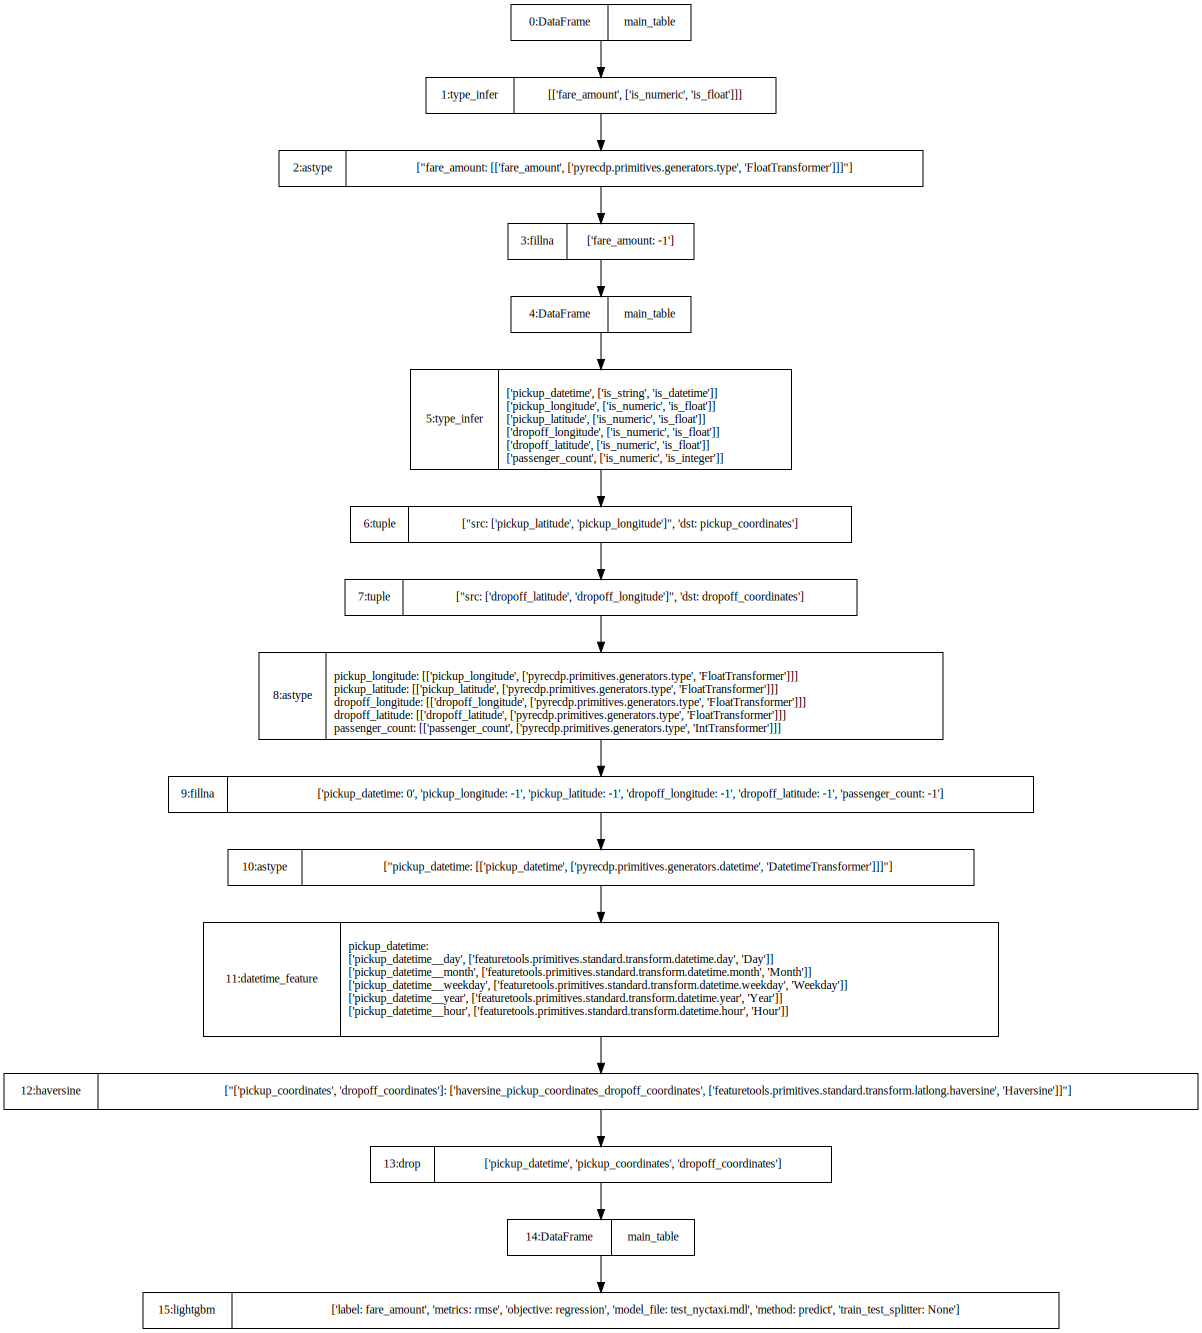

In [4]:
predict_pipeline.plot()